# PROJETO 1 - ANÁLISE DE FATURAMENTO & VENDAS


### Dados de 2019 de uma empresa de prestação de serviços para fazermos as análises. 

- Cadastro Funcionarios
- Cadastro Clientes
- Base Serviços Prestados

### 1) Importando as bibliotecas necessárias 

Nesta etapa, vou carregar as bibliotecas que serão usadas ao longo do projeto.  
- **pandas**: para manipulação e análise dos dados em formato de tabelas (DataFrames).  
- **matplotlib.pyplot**: para criar gráficos e visualizar os resultados.  
 

Essas bibliotecas são fundamentais para trabalhar com dados em Python e vão aparecer em várias partes do notebook.


In [53]:
import pandas as pd
import matplotlib.pyplot as plt 


### 2) Lendo arquivos de dados 

Nesta etapa, vou carregar os três arquivos que serão utilizados no projeto:

- **CadastroFuncionarios.csv** → contém informações dos funcionários da empresa, incluindo o ID e a área de atuação.  
- **CadastroClientes.csv** → contém informações dos clientes cadastrados.  
- **BaseServiçosPrestados.xlsx** → contém todos os contratos/serviços já fechados, com detalhes como código do serviço, ID do funcionário e ID do cliente.

Para cada arquivo, utilizei funções do **pandas**:
- `pd.read_csv()` para ler arquivos em formato CSV.  
- `pd.read_excel()` para ler arquivos em formato Excel.  

Também defini parâmetros como:
- `encoding="utf-8"` → garante que acentos e caracteres especiais sejam lidos corretamente.  
- `sep=";"` → informa que os dados nos CSV estão separados por ponto e vírgula.  
- `decimal=","` → ajusta números decimais que usam vírgula em vez de ponto.  
- `index_col=False` → evita que alguma coluna seja usada automaticamente como índice.

In [54]:
cadastro_funcionarios_df = pd.read_csv("CadastroFuncionarios.csv", encoding="utf-8", sep=";" , decimal="," , index_col = False)
cadastro_clientes_df = pd.read_csv("CadastroClientes.csv", encoding="utf-8", sep=";", index_col = False)
base_serv_df = pd.read_excel("BaseServiçosPrestados.xlsx", index_col = False)



### 3) Exibindo um resumo dos DataFrames<br>

Antes de iniciar a análise, é importante verificar a estrutura dos dados carregados.  
Com o comando `.info()`, consigo visualizar rapidamente:

- Quantidade de linhas e colunas em cada arquivo.  
- Nome das colunas disponíveis.  
- Tipo de dado de cada coluna (numérico, texto, etc.).  
- Quantidade de valores não nulos em cada coluna.  

Isso garante que os arquivos foram lidos corretamente e ajuda a identificar possíveis ajustes necessários.

In [55]:
cadastro_funcionarios_df.info()
print("- " *34)
cadastro_clientes_df.info()
print("- " *34)
base_serv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID Funcionário  114 non-null    int64  
 1   Estado Civil    114 non-null    object 
 2   Nome Completo   114 non-null    object 
 3   Salario Base    114 non-null    int64  
 4   Impostos        114 non-null    float64
 5   Beneficios      114 non-null    float64
 6   VT              114 non-null    int64  
 7   VR              114 non-null    float64
 8   Cargo           114 non-null    object 
 9   Area            114 non-null    object 
dtypes: float64(3), int64(3), object(4)
memory usage: 9.0+ KB
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID Cliente   

### 4) Explorando os dados 

Nesta etapa, vou visualizar as primeiras linhas de cada DataFrame com o comando `.head()`.  
O objetivo é verificar se os arquivos foram importados corretamente e identificar possíveis problemas, como:

- **Erros de grafia** nas colunas ou valores.  
- **Cabeçalhos deslocados** (quando o nome das colunas aparece como uma linha de dados).  
- **Estrutura geral dos dados**, conferindo se cada tabela está organizada como esperado.

Para isso, exibo separadamente:
- Cadastro de Funcionários  
- Cadastro de Clientes  
- Base de Serviços Prestados

In [56]:
print("CADASTRO DE FUNCIONÁRIOS")
display(cadastro_funcionarios_df.head())

print("- " *34)

print("CADASTRO DE CLIENTES")
display(cadastro_clientes_df.head())

print("- " *34)
print("BASE SERVIÇOS PRESTADOS")
display(base_serv_df.head())

CADASTRO DE FUNCIONÁRIOS


,ID Funcionário,Estado Civil,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area
0,1,C,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Diretor,Operações
1,2,C,João Haddad,5404,2702.0,1080.8,154,574.56,Estagiário,Logística
2,3,C,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Estagiário,Administrativo
3,4,C,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Analista,Administrativo
4,5,C,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Analista,Administrativo


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
CADASTRO DE CLIENTES


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510


- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
BASE SERVIÇOS PRESTADOS


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8


### 5) Calculando o Valor Total da Folha Salarial 

Nesta etapa, vou calcular o custo total da folha salarial da empresa.  
Para isso, somo os valores de cada componente do salário dos funcionários:

- **Salário Base**  
- **Impostos**  
- **Vale Refeição (VR)**  
- **Vale Transporte (VT)**  
- **Benefícios**

Em seguida, utilizo o método `.sum()` para obter o valor total da folha.<br>
Esse cálculo é feito diretamente com o **pandas**.

In [57]:
salario_func = cadastro_funcionarios_df["Salario Base"] + cadastro_funcionarios_df["Impostos"] + cadastro_funcionarios_df["VR"] + cadastro_funcionarios_df["VT"] + cadastro_funcionarios_df["Beneficios"]
valor_total_folha_salarial = salario_func.sum() 
print("Valor Total da Folha Salarial é de: R${:,.2f}".format(valor_total_folha_salarial)) 

Valor Total da Folha Salarial é de: R$2,717,493.22


### 6) Calculando o Faturamento Total da Empresa 

Nesta etapa, o objetivo foi calcular o **faturamento total da empresa** considerando todos os contratos ativos.  
Para isso, multipliquei o valor mensal de cada contrato pelo tempo total de duração em meses, obtendo o valor acumulado por serviço.  
Em seguida, somei todos esses valores para chegar ao faturamento global.


In [58]:
total_por_servico = cadastro_clientes_df["Valor Contrato Mensal"] * base_serv_df["Tempo Total de Contrato (Meses)"]
faturamento_total = total_por_servico.sum() 
print("Faturamento Total da Empresa é de R$: {:,.2f}".format(faturamento_total)) 

Faturamento Total da Empresa é de R$: 5,628,330.00


### Conclusão
- O cálculo mostra o faturamento total da empresa ao longo do período considerado.<br>
- Esse indicador é fundamental para avaliar a saúde financeira da organização, permitindo análises estratégicas sobre crescimento, sustentabilidade e projeções futuras.


### 7) Percentual de funcionários que já fecharam contrato<br>

Nesta etapa, vou calcular a porcentagem de funcionários da empresa que já participaram do fechamento de contratos.

Passos realizados:
1. Utilizo o método `.unique()` na coluna **ID Funcionário** da base de serviços para obter apenas os IDs distintos (sem repetições).  
2. Aplico `len()` sobre esse array para saber quantos funcionários únicos já fecharam contratos.  
3. Calculo o total de funcionários da empresa usando `len()` na coluna **ID Funcionário** do DataFrame `cadastro_funcionarios_df`.  
4. Divido a quantidade de funcionários que fecharam contratos pelo total de funcionários da empresa para obter a porcentagem.  
5. Exibo o resultado formatado em percentual com duas casas decimais.

Esse cálculo mostra de forma clara qual é a representatividade dos funcionários que já fecharam contratos em relação ao total da empresa.<br>
Além disso, para visualizar melhor os resultados, criei um **gráfico de barras** mostrando o percentual de funcionários que já fecharam contratos em comparação com os que ainda não fecharam.



A quantidade de funcionários que já fecharam contratos é: 99
O Total de Funcionários na empresa é: 114
86.84% dos funcionários já fecharam contratos


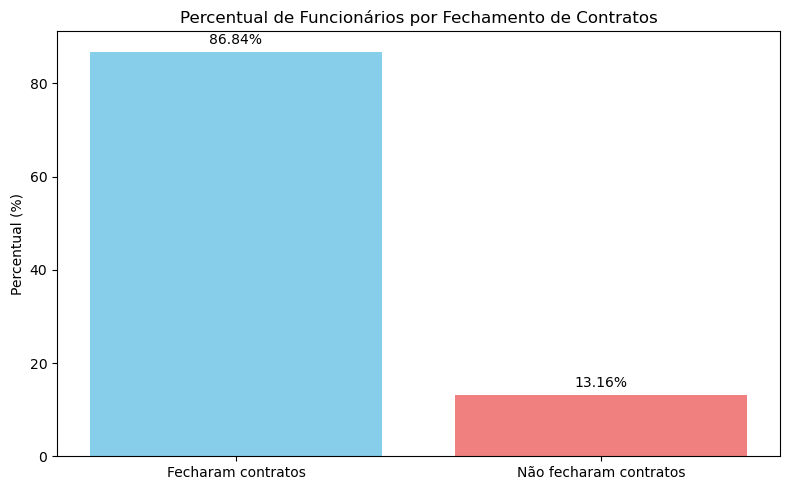

In [59]:
funcionarios_unicos = base_serv_df["ID Funcionário"].unique() 
qtde_funcionarios_contratos = len(funcionarios_unicos)
print("A quantidade de funcionários que já fecharam contratos é: {}".format(qtde_funcionarios_contratos)) 


total_funcionarios_empresa = len(cadastro_funcionarios_df["ID Funcionário"])
print("O Total de Funcionários na empresa é: {}".format(total_funcionarios_empresa)) 

porcentagem_func_contratos = qtde_funcionarios_contratos / total_funcionarios_empresa
print("{:.2%} dos funcionários já fecharam contratos".format(porcentagem_func_contratos))



# Legendas do Eixo X e valores para o gráfico

labels = ["Fecharam contratos", "Não fecharam contratos"]
values = [porcentagem_func_contratos * 100, (1 - porcentagem_func_contratos) * 100]

# Criando o gráfico de barras
plt.figure(figsize=(8,5))
plt.bar(labels, values, color=["skyblue", "lightcoral"])
plt.title("Percentual de Funcionários por Fechamento de Contratos")
plt.ylabel("Percentual (%)")

# Adicionando rótulos nas barras
for i, v in enumerate(values):
    plt.text(i, v + 1, f"{v:.2f}%", ha='center', va='bottom')

plt.tight_layout()
plt.show()




### Conclusão

- Com esse cálculo e o gráfico, é possível observar que uma parte significativa dos funcionários da empresa, de diferentes áreas, já participou do fechamento de contratos, enquanto outra parcela ainda não.  
- Esse percentual ajuda a avaliar o nível de engajamento dos colaboradores e pode servir como indicador de desempenho organizacional.

### 8) Calculando o total de contratos que cada área da empresa já fechou

Nesta etapa, vou identificar quantos contratos foram fechados por cada área da empresa.

Passos realizados:
1. **Junção dos DataFrames**:  
   - Utilizo o método `.merge()` para unir `base_serv_df` (contratos) com `cadastro_funcionarios_df` (funcionários).  
   - A coluna em comum é **ID Funcionário**, garantindo que cada contrato seja associado à área correta do funcionário que o fechou.

2. **Adição da coluna Área**:  
   - A coluna **Área**, presente em `cadastro_funcionarios_df`, é incorporada ao DataFrame de contratos `base_serv_df`, surgindo um novo DataFrame `contratos_com_area_df` .  
   - Isso permite relacionar cada contrato à área de atuação do funcionário responsável.

3. **Contagem dos contratos por área**:  
   - Uso o método `.value_counts()` para contar quantas vezes cada área aparece no DataFrame resultante (`contratos_por_area_df`).  
   - Em seguida, reorganizo os dados com `.reset_index()` e `.rename()` para criar um DataFrame mais legível, com duas colunas:  
     - **Área**  
     - **Qtde_Contratos**

4. **Visualização com gráfico de barras**: 
    -Criei um gráfico de barras apresentando o total de contratos por área, usando uma paleta com cinco cores distintas (verde, rosa, amarelo, roxo, azul piscina) para destacar cada área

Esse processo mostra claramente a distribuição de contratos entre as diferentes áreas da empresa.



,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses),Area
0,OS0001,67,1,14,Financeiro
1,OS0002,17,2,12,Logística
2,OS0003,116,4,14,Logística
3,OS0004,37,5,8,Financeiro
4,OS0005,130,6,8,Comercial
...,...,...,...,...,...
232,OS0233,111,315,4,Operações
233,OS0234,124,316,8,Comercial
234,OS0235,72,317,6,Logística
235,OS0236,90,319,14,Administrativo


Area
Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: count, dtype: int64

,Area,Qtde_Contratos
0,Administrativo,63
1,Operações,48
2,Comercial,44
3,Financeiro,42
4,Logística,40


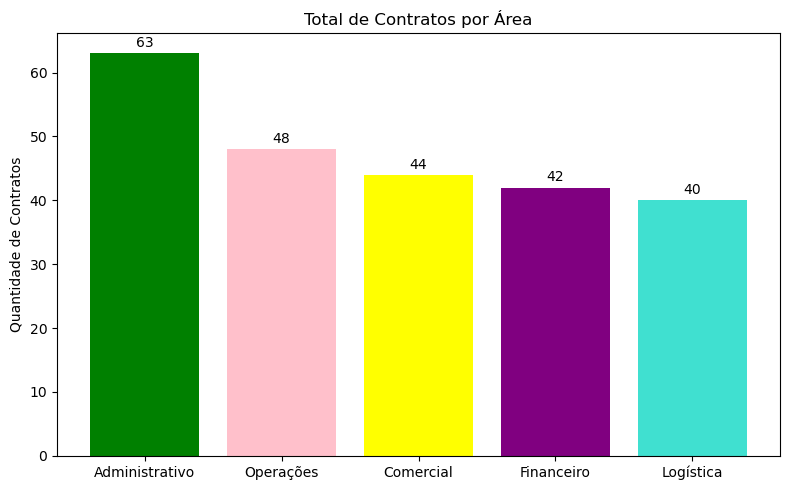

In [60]:
#Junção dos DataFrames com a adição da coluna Área

contratos_com_area_df = base_serv_df.merge( cadastro_funcionarios_df[["ID Funcionário", "Area"]], on="ID Funcionário", how="inner")
display(contratos_com_area_df)

#Contagem dos contratos por área: 
contratos_por_area_df = contratos_com_area_df["Area"].value_counts()
display(contratos_por_area_df)

# Reorganizando os dados e criando um DataFrame mais legível com duas colunas 
contratos_por_area_df = (
    contratos_com_area_df["Area"]
    .value_counts()
    .reset_index()
    .rename(columns={"index": "Area", "count": "Qtde_Contratos"})
)

display(contratos_por_area_df)

# Criando o gráfico 

# Usando o DataFrame contratos_por_area_df criado
areas = contratos_por_area_df["Area"]
valores = contratos_por_area_df["Qtde_Contratos"]

# Definindo cores diferentes para cada área
cores = ["green", "pink", "yellow", "purple", "turquoise"]

plt.figure(figsize=(8,5))
plt.bar(areas, valores, color=cores)
plt.title("Total de Contratos por Área")
plt.ylabel("Quantidade de Contratos")

# Adicionando rótulos nas barras
for i, v in enumerate(valores):
    plt.text(i, v + 0.5, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Conclusão
- Insight principal: O gráfico evidencia a distribuição de contratos entre as áreas, facilitando identificar quais equipes têm maior participação e onde há oportunidades de melhoria.
- Utilidade prática: A visualização complementa a contagem numérica e apoia decisões de alocação de recursos e avaliação de desempenho por área.


### 9) Calculando o total de funcionários por área 

Nesta etapa, vou calcular quantos funcionários pertencem a cada área da empresa.

Passos realizados:
1. Criei um novo DataFrame contendo apenas as colunas **ID Funcionário** e **Área**, para focar na informação relevante.  
2. Agrupei os dados por área utilizando o método `.size()`, que conta a quantidade de registros em cada grupo.  
3. Reestruturei o resultado em um formato mais legível, com duas colunas:  
   - **Área**  
   - **Número de Funcionários**  
4. Para facilitar a interpretação, utilizei um **gráfico de barras horizontais**, que mostra de forma clara a distribuição de funcionários entre as áreas.



,ID Funcionário,Area
0,1,Operações
1,2,Logística
2,3,Administrativo
3,4,Administrativo
4,5,Administrativo
...,...,...
109,143,Logística
110,144,Comercial
111,148,Administrativo
112,149,Comercial


Area
Administrativo    26
Comercial         26
Financeiro        18
Logística         21
Operações         23
dtype: int64

,Area,Número de Funcionários por Área
0,Administrativo,26
1,Comercial,26
2,Operações,23
3,Logística,21
4,Financeiro,18


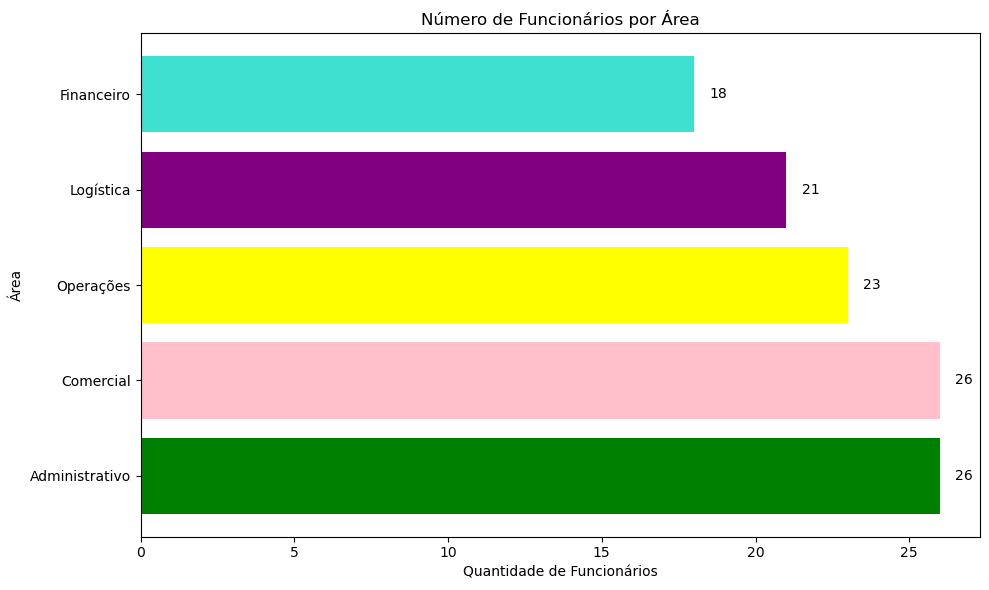

In [61]:
# Criando um DataFrame com a coluna "ID funcionários" e a coluna "Area". 

funcionarios_por_area_df = cadastro_funcionarios_df[["ID Funcionário", "Area"]] 
display(funcionarios_por_area_df) 

# Agrupando por Área 
# Para contar o número de linhas pode ser usado tanto o .size() ou quanto o .count(). 
# number_funcionarios_por_area = funcionarios_por_area_df.groupby("Area")["ID Funcionario"].count()
# Obs: aqui optei por .size() (conta todas as linhas, inclusive nulos)


number_funcionarios_por_area_df = funcionarios_por_area_df.groupby("Area").size() 
display(number_funcionarios_por_area_df)

# Reorganizando os dados e criando um DataFrame mais legível com duas colunas 
number_funcionarios_por_area_df = (
    funcionarios_por_area_df["Area"]
    .value_counts()
    .reset_index()
    .rename(columns={"index": "Area", "count": "Número de Funcionários por Área"})
)

display(number_funcionarios_por_area_df)

# Criando Gráfico de colunas horizontais sobre a distribuição de funcionários por área 

areas = number_funcionarios_por_area_df["Area"]
quantidades = number_funcionarios_por_area_df["Número de Funcionários por Área"]

# Cores para cada barra
cores = ['green', 'pink', 'yellow', 'purple', 'turquoise']

plt.figure(figsize=(10,6))
plt.barh(areas, quantidades, color=cores)
plt.title('Número de Funcionários por Área')
plt.xlabel('Quantidade de Funcionários')
plt.ylabel('Área')



# Adicionando rótulos nas barras horizontais 
for i, v in enumerate(quantidades):
    plt.text(v + 0.5, i, str(v), va='center', ha='left')


plt.tight_layout()
plt.show()


### Conclusão

- O cálculo do total de funcionários por área mostra como os colaboradores estão distribuídos na empresa.  
- Esse panorama evidencia quais áreas concentram mais profissionais e quais possuem equipes menores, fornecendo uma base importante para análises de recursos humanos e gestão organizacional.

## 10) Contribuição das Áreas no Fechamento Total de Contratos e Análise de Produtividade

Nesta etapa, o objetivo principal foi entender a Contribuição Percentual de cada área no volume total de contratos fechados pela empresa, ao mesmo tempo em que se calculava a Taxa de Produtividade (Contratos por Funcionário) de cada setor.

Passos realizados:

1. Cálculo da Taxa de Produtividade `(Contratos por Funcionário)`: Calculei a eficiência de cada área, dividindo a Quantidade de Contratos (Qtde_Contratos) pelo Número de Funcionários por Área e multiplicando por 100. Esta métrica `(coluna Taxa_Fechamento(%))` é crucial para identificar quais áreas são mais eficientes na geração de contratos por pessoa.

2. Cálculo da Proporção de Contratos: Para criar o gráfico de pizza, calculei a Soma Total de todos os contratos fechados na empresa. Em seguida, dividi os Qtde_Contratos de cada área por este total e multipliquei por 100 `(coluna Participacao_Contratos_Por_Area(%))`.

3. Visualização `(Gráfico de Pizza)`: Utilizei um Gráfico de Pizza que mostra a proporção da contribuição de cada área para o volume total de contratos da empresa.


A quantidade total de contratos fechados foi de 237


,Area,Número de Funcionários por Área,Qtde_Contratos,Taxa_Fechamento (%),Participacao_Contratos_por_Area (%)
0,Administrativo,26,63,242.31,26.58
1,Comercial,26,44,169.23,18.57
2,Operações,23,48,208.70,20.25
3,Logística,21,40,190.48,16.88
4,Financeiro,18,42,233.33,17.72


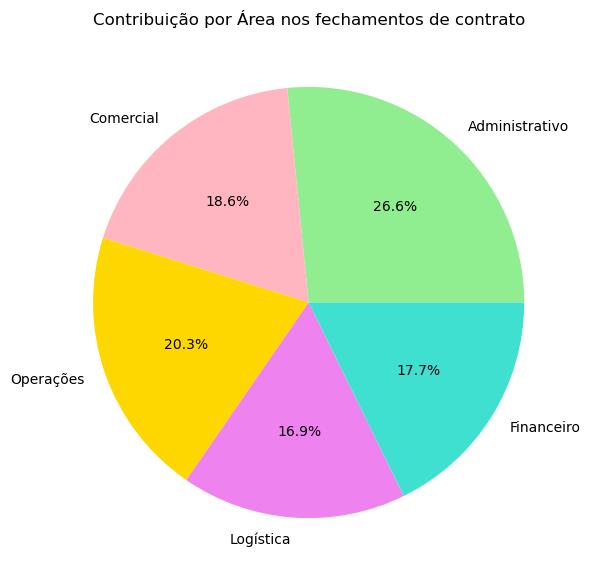

In [62]:
# Criando um DataFrame 
contratos_func_area_df = number_funcionarios_por_area_df.merge(
    contratos_por_area_df,
    on="Area",
    how="inner"
)

# Calculando a taxa de fechamento
contratos_func_area_df["Taxa_Fechamento (%)"] =  ((contratos_func_area_df["Qtde_Contratos"] /contratos_func_area_df["Número de Funcionários por Área"]) * 100).round(2)

# Proporção de cada área no total de contratos fechados
#Somando a quantidade total de contratos 
total_de_contratos = contratos_func_area_df["Qtde_Contratos"].sum()
print("A quantidade total de contratos fechados foi de {}".format(total_de_contratos))  

# Calculando Taxa de Participação de fechamento de contratos por área 
contratos_func_area_df["Participacao_Contratos_por_Area (%)"] = ((contratos_func_area_df["Qtde_Contratos"] / total_de_contratos) * 100) .round(2) 
display(contratos_func_area_df)

# Criando gráfico de pizza
plt.figure(figsize=(7,7))
plt.pie(contratos_func_area_df["Participacao_Contratos_por_Area (%)"], labels=areas, autopct="%.1f%%", colors=["lightgreen","lightpink","gold","violet","turquoise"])
plt.title("Contribuição por Área nos fechamentos de contrato")
plt.show()

### Conclusão

Ao analisar os gráficos de `*Total de Contratos por área*`, `*Número de funcionários por área*` e o `*Contribuição por Área nos fechamentos de contrato*`, observou-se que o tamanho da equipe não é o único fator determinante para o fechamento de contratos. O gráfico de pizza evidencia que algumas áreas, mesmo com menos colaboradores, apresentam `maior eficiência relativa`, o que pode indicar boas práticas internas ou maior especialização. 
A análise revela diferenças significativas na eficiência entre os setores:

- Liderança e Volume (Proporção): A área `Administrativo` lidera em número de funcionários (26) e em Proporção Total de Contratos, contribuindo com $26.6\%$ do volume geral de contratos efetivados (evidenciado no gráfico de pizza).
- Eficiência (Produtividade): A área de `Operações`, terceira em número de funcionários (23), surge como a segunda em Proporção Total de Contratos com uma taxa de $20.3\%$. Este resultado é impulsionado por uma Taxa de Produtividade (Contratos por Funcionário) de $209.0\%$ (48 contratos / 23 funcionários), demonstrando alta performance.
- O Contraste: A área `Comercial`, embora tenha o mesmo número de funcionários que a `Administrativo` (26), apresenta uma Proporção Total de Contratos de $18.6\%$, ocupando a terceira posição em volume de vendas. Esta baixa performance é refletida em uma Taxa de Produtividade de $169.0\%$, que é significativamente inferior à de `Operações` com seus $209.0\%$.
- Destaque: A área `Financeiro`, com menos colaboradores (15), apresenta uma performance robusta com uma Taxa de Produtividade de $233.0\%$, superando quase todas as outras áreas em eficiência por funcionário, ficando atrás apenas da área `Administrativo`, a qual possui uma Taxa de Produtividade de $242,31\%$.

 

### Insight e Recomendação
Os dados evidenciam que algumas áreas, mesmo com menos colaboradores, apresentam maior eficiência relativa (Taxa de Produtividade).

- Recomendação Analítica: Sugere-se uma investigação aprofundada nos processos das áreas de Financeiro e Operações para identificar e documentar as melhores práticas, que podem incluir maior especialização da equipe ou metodologias de trabalho mais eficazes. A implementação dessas práticas nas áreas com produtividade inferior (Comercial e Logística) pode otimizar a geração de contratos em toda a empresa.

### 11) Identificação e Ranking dos Top Performers Individuais
Após analisar a produtividade média por área (item 10), esta etapa visa identificar os colaboradores com o melhor desempenho individual em fechamento de contratos, permitindo a gestão de talentos e a disseminação de melhores práticas.

Passos realizados:

1) Preparação de Dados: Um novo DataFrame foi criado combinando as informações do "ID Funcionário" com o "ID Cliente" e a "Área" de cada funcionário para contar o número total de contratos fechados por cada colaborador.

2)  Criação do Ranking: Ordenei o resultado de forma decrescente para criar um ranking de vendedores.

3) Filtragem de Top Performers: Filtrei os 5 melhores vendedores da empresa para análise detalhada.



In [63]:
#Trouxe os dataframes "base_serv_df" e "cadastro_funcionarios_df" para recordar quais são suas colunas 
#display(base_serv_df.head())
#display(cadastro_funcionarios_df.head())

# Criando um novo DataFrame com somente as colunas "ID Funcionário" e "ID Cliente"
performance_funcionarios_df = base_serv_df[["ID Funcionário" , "ID Cliente"]]

#Adicionando a coluna "Area" no novo DataFrame "performance_funcionarios"
# O merge deve ser feito na coluna comum: "ID Funcionário"
# Dessa forma, o DataFrame performance_funcionarios_df ganha a coluna "Area"
performance_funcionarios_df= performance_funcionarios_df.merge(
    cadastro_funcionarios_df[["ID Funcionário" , "Area"] ], # Pega as colunas necessárias do cadastro
    on = "ID Funcionário",
    how = "left" ) # Recomenda-se usar 'left' ou 'inner' dependendo da necessidade
   

display(performance_funcionarios_df.head())

# Contando quantos contratos cada funcionário fechou e mantendo a informação da área
ranking_df = performance_funcionarios_df.groupby(["ID Funcionário", "Area"])["ID Cliente"].count().reset_index()

# Renomeando a coluna "ID Cliente" para "Qtde_Contratos_Fechados"
ranking_df = ranking_df.rename(columns={"ID Cliente": "Qtde_Contratos_Fechados"})
display(ranking_df)

# Criando o Ranking
# Agora vou ordenar o DataFrame pelo número de contratos, do maior para o menor
ranking_df = ranking_df.sort_values(by="Qtde_Contratos_Fechados", ascending=False)

# Exibindo os 5 funcionários com mais contratos fechados
top_5_vendedores = ranking_df.head(5)
print("--- Ranking Top 5 Vendedores ---")
display(top_5_vendedores)

,ID Funcionário,ID Cliente,Area
0,67,1,Financeiro
1,17,2,Logística
2,116,4,Logística
3,37,5,Financeiro
4,130,6,Comercial


,ID Funcionário,Area,Qtde_Contratos_Fechados
0,1,Operações,1
1,3,Administrativo,2
2,4,Administrativo,5
3,5,Administrativo,1
4,7,Financeiro,4
...,...,...,...
94,139,Administrativo,2
95,142,Logística,3
96,144,Comercial,3
97,148,Administrativo,3


--- Ranking Top 5 Vendedores ---


,ID Funcionário,Area,Qtde_Contratos_Fechados
33,47,Operações,6
27,37,Financeiro,5
59,84,Logística,5
2,4,Administrativo,5
38,54,Administrativo,4


### Insight e Conclusão
O ranking dos Top 5 Vendedores revela um contraste crucial com a distribuição de funcionários:

- Liderança da Produtividade: O setor de Operações lidera a lista com o vendedor de melhor desempenho (6 contratos fechados).

- Eficiência Concentrada: O Financeiro (área com o menor número de funcionários) e a Logística (quarta em número de funcionários) garantem vagas importantes no Top 5. Isso sugere que suas altas Taxas de Produtividade (vistas no Item 10) são impulsionadas por indivíduos de alto desempenho.

⚠️ Alerta: A área Comercial, a mais numerosa e com o propósito de vendas, está totalmente ausente no ranking dos 5 melhores.

- Esta ausência reforça a conclusão do Item 10: a baixa produtividade da área Comercial não é apenas uma questão de média, mas pode indicar uma falta de talentos de alto impacto ou a necessidade urgente de treinamento e reestruturação de processos de vendas focados no core business.

💡 Recomendação Final<br>
- Para mitigar a baixa produtividade na área Comercial, sugere-se uma análise comparativa detalhada dos métodos e pipelines de vendas usados pelo Top Performer da Operações (ID 47) e pelo vendedor do Financeiro (ID 37), aplicando os benchmarks identificados para otimizar o desempenho de toda a equipe Comercial.

### 12) Calculando o Ticket Médio Mensal dos Contratos (KPI) <br>

O Ticket Médio Mensal é uma Métrica Chave de Desempenho (KPI) essencial, pois representa o valor médio que cada cliente contratante gera em receita por mês para a empresa. Este valor é crucial para o planejamento financeiro e para avaliar a qualidade das vendas (valor vs. volume).

Passos realizados:

1. Seleção da Métrica: Selecionei a coluna "Valor Contrato Mensal" do DataFrame que contém os dados financeiros dos clientes`cadastro_clientes_df`.

2. Cálculo da Média: Apliquei o método de agregação .mean() para calcular a média aritmética de todos os valores de contrato mensal.

3. Formatação: O resultado foi formatado para duas casas decimais e exibido para fácil leitura.

In [64]:
faturamento_medio_mensal = cadastro_clientes_df["Valor Contrato Mensal"].mean()

print("Faturamento Médio Mensal da Empresa é de R$: {:,.2f}".format(faturamento_medio_mensal)) 

Faturamento Médio Mensal da Empresa é de R$: 2,502.56


### Insight<br>

- O valor de R$ 2.502,56 estabelece um ponto de referência para o valor esperado de cada novo contrato.<br> 

- Ao correlacionar este Ticket Médio com a Taxa de Produtividade das áreas (Item 10), a empresa pode avaliar não apenas a quantidade de contratos que cada setor fecha, mas também o valor financeiro que eles trazem. Por exemplo, a área Operações (com alta produtividade) está fechando contratos com valor médio acima ou abaixo desse Ticket Médio?

### 13) Análise da Qualidade Financeira dos Contratos por Área

- Objetivo: Determinar se as áreas de alta produtividade (como Operações) estão focadas em volume de contratos de baixo valor ou se estão fechando negócios de alto ticket, comparando o Ticket Médio de cada setor com o Ticket Médio da Empresa.

In [ ]:
#display(cadastro_clientes_df.head())
#display(cadastro_funcionarios_df.head())
#display(base_serv_df.head())

#Unir o DataFrame "cadastro_funcionarios_df" com "base_serv_df"
uniao_func_serv_df = base_serv_df.merge(cadastro_funcionarios_df[["ID Funcionário" , "Area"]],
         on = "ID Funcionário",
         how = "left")

#Criando um dataframe só com as colunas que interessam "ID Funcionário" e "Area"
ticket_medio_area_df = uniao_func_serv_df[["ID Funcionário" , "Area", "ID Cliente"]]


#Adicionando a coluna "Valor Contrato Mensal" do dataframe "cadastro_clientes_df" ao novo DataFrame "ticket_médio_area_df"
# O merge deve ser feito na coluna comum: "ID Ciente"
# Dessa forma, o DataFrame ticket_medio_area_df ganha a coluna "Valor Contrato Mensal"
ticket_medio_area_df= ticket_medio_area_df.merge(
    cadastro_clientes_df[["ID Cliente" , "Valor Contrato Mensal"] ], # Pega as colunas necessárias do cadastro
    on = "ID Cliente",
    how = "left" ) 
display(ticket_medio_area_df)

# Agrupando dados pela coluna "Area" e calculando a média dos valores de contrato em cada área. 
ticket_medio_area_df = (ticket_medio_area_df.groupby("Area")["Valor Contrato Mensal"]
    .mean()
    .round(2)
    .reset_index() ) 


# Renomeando a coluna FINAL
print("--- Ticket Médio (Valor) dos Contratos por Área ---")
ticket_medio_area_df = ticket_medio_area_df.rename(columns = {"Valor Contrato Mensal": "Ticket Médio Mensal por Área"})

display(ticket_medio_area_df)








,ID Funcionário,Area,ID Cliente,Valor Contrato Mensal
0,67,Financeiro,1,540
1,17,Logística,2,1260
2,116,Logística,4,2520
3,37,Financeiro,5,3510
4,130,Comercial,6,2340
...,...,...,...,...
232,111,Operações,315,1575
233,124,Comercial,316,3690
234,72,Logística,317,2385
235,90,Administrativo,319,4185


--- Ticket Médio (Valor) dos Contratos por Área ---


,Area,Ticket Médio Mensal por Área
0,Administrativo,2512.14
1,Comercial,2466.82
2,Financeiro,2392.50
3,Logística,2291.62
4,Operações,2477.81


### Conclusão 

Análise da Qualidade Financeira dos Contratos (Ticket Médio por Área). Esta etapa complementa a análise de produtividade (volume), avaliando o valor financeiro médio que cada área gera por contrato (Ticket Médio por Área) em comparação ao Ticket Médio geral da empresa ($\mathbf{R\$ 2.502,56}$).

| Área | Ticket Médio Mensal por Área | Comparação com TM da Empresa (R$ 2.502,56) |
| :--- | :---: | :---: |
| **Administrativo** | R$ 2.512,14 | **Acima** |
| Comercial | R$ 2.466,82 | Abaixo |
| Financeiro | R$ 2.392,50 | Abaixo |
| Logística | R$ 2.291,62 | Abaixo |
| Operações | R$ 2.477,81 | Abaixo |

💡 Insight Principal
- Administrativo Lidera em Valor: A única área que consistentemente fecha contratos com valor médio acima do Ticket Médio da empresa é a Administrativo, indicando que, além de ser produtiva em volume, ela se destaca na qualidade financeira das negociações.

- Operações (Volume vs. Valor): A área Operações, embora tenha alta produtividade em volume, fecha contratos com valor ligeiramente abaixo da média da empresa ($\text{R\$ }2.477,81$). Isso sugere que o foco da área está em fechar rapidamente (volume), e não necessariamente em otimizar o preço.

### 🌟 Resumo Executivo: Análise de Produtividade e Qualidade de Vendas por Área

Este projeto de Análise de Dados avaliou o desempenho de fechamento de contratos da empresa em três dimensões críticas: Eficiência (Taxa de Produtividade), Talento Individual (Ranking) e Qualidade Financeira (Ticket Médio).

A análise demonstrou que o tamanho da equipe não é o fator determinante para o sucesso, revelando a Área Comercial como o principal ponto de atenção e a Área Operações como o melhor benchmark interno.

1. 📊 Resultados Chave da Análise

| Área | Ticket Médio Mensal por Área | Comparação com TM da Empresa (R$ 2.502,56) |
| :--- | :---: | :---: |
| **Administrativo** | **R$ 2.512,14** | **Acima** |
| Operações | R$ 2.477,81 | Abaixo |
| Comercial | R$ 2.466,82 | Abaixo |
| Financeiro | R$ 2.392,50 | Abaixo |
| Logística | R$ 2.291,62 | Abaixo |

2. 💡 Conclusões Estratégicas

    a) Eficiência Desconectada do Tamanho: As áreas `Administrativo` e `Financeiro` demonstram a maior eficiência relativa (Taxa de Produtividade de $242.31\%$ e $233.0\%$, respectivamente), provando que a alta eficácia é resultado de uma estrutura/processo superior, e não da quantidade de colaboradores.

    b) Liderança em Qualidade Financeira: A área `Administrativo` é a única que consistentemente fecha contratos com valor médio ($\text{R\$ }2.512,14$) acima do Ticket Médio geral da empresa ($\text{R\$ }2.502,56$), indicando excelência na negociação de valor.

    c) A Contradição da Área Comercial: O setor `Comercial`, uma das áreas mais populosa (26 funcionários) e focada em vendas, apresenta o desempenho mais preocupante:<br>
            - Pior Produtividade: Menor Taxa de Fechamento ($169.0\%$).<br>
            - Ausência de Talentos: Nenhum colaborador no ranking dos Top 5 Vendedores.
    
    Isto reforça que a baixa performance não é apenas uma média, mas um problema sistêmico que pode indicar falta de talentos de alto impacto ou processos de vendas ineficazes (pipelines desatualizados).

3. 🎯 Recomendação Final (Ação Imediata)
- Sugere-se o lançamento de um programa de Benchmarking Interno para elevar a performance da Área Comercial.

- Identificar e Documentar o Sucesso: Fazer uma análise detalhada dos métodos e processos de vendas (pipelines) utilizados pelo Top Performer da Operações (ID 47) e pelos vendedores de alta eficiência da área Administrativo.

- Implementação Estruturada: Aplicar as melhores práticas e padrões identificados (benchmarks) como treinamento obrigatório na área Comercial, focando na elevação da Taxa de Produtividade e na otimização da negociação para aumentar o Ticket Médio do setor.